<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Act.-vs-Pooling.-who-first?" data-toc-modified-id="Act.-vs-Pooling.-who-first?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Act. vs Pooling. who first?</a></span></li><li><span><a href="#ReLU-vs.-ELU" data-toc-modified-id="ReLU-vs.-ELU-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ReLU vs. ELU</a></span></li><li><span><a href="#Max-vs.-Avg" data-toc-modified-id="Max-vs.-Avg-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Max vs. Avg</a></span></li><li><span><a href="#Delated-or-not?" data-toc-modified-id="Delated-or-not?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Delated or not?</a></span></li><li><span><a href="#Conv.-feature-maps:-one-half,-double,-fourfold?" data-toc-modified-id="Conv.-feature-maps:-one-half,-double,-fourfold?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conv. feature maps: one half, double, fourfold?</a></span></li><li><span><a href="#Conv.-4?-5?-layers" data-toc-modified-id="Conv.-4?-5?-layers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conv. 4? 5? layers</a></span></li><li><span><a href="#MLP-hidden:-32,-128?" data-toc-modified-id="MLP-hidden:-32,-128?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>MLP hidden: 32, 128?</a></span></li><li><span><a href="#MLP-2?3?-layers" data-toc-modified-id="MLP-2?3?-layers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MLP 2?3? layers</a></span></li><li><span><a href="#Dropout-or-not?" data-toc-modified-id="Dropout-or-not?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Dropout or not?</a></span></li><li><span><a href="#PLB" data-toc-modified-id="PLB-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>PLB</a></span></li><li><span><a href="#PRL" data-toc-modified-id="PRL-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>PRL</a></span></li></ul></div>

In [1]:
import numpy as np
from mxnet import ndarray as nd
import matplotlib.pyplot as plt

import utils
from utils import creat_dataset
from utils import MKdir_checkdir

CPU or GPU? :  gpu(0)


In [2]:
url_train = ['../GW_data/GW_train_full.csv'
,'../noise1/LigoNose9_9000_8192_1.csv'
,'../noise2/LigoNose9_9000_8192_3.csv']
url_test = ['../GW_data/GW_test_full.csv'
,'../noise1/LigoNose9_9000_8192_2.csv'
,'../noise2/LigoNose9_9000_8192_4.csv']

snr = ['1']
train_dict, colomns_add = creat_dataset('train', url_train, snr)
test_dict, colomns_add = creat_dataset('test', url_test, snr)
colomns_add

The shape of input GW signals for train:  (704, 8192)
The shape of input noises for mixture:  (10000, 8192)
The shape of input noises for conterpart:  (10000, 8192)
dict_keys(['1'])
The shape of the values in each key:  (19712, 8199)
colomns_add:  ['mass', 'positions', 'gaps', 'max_peak', 'sigma', 'SNR_mf', 'SNR_mf0']
The shape of input GW signals for test:  (736, 8192)
The shape of input noises for mixture:  (10000, 8192)
The shape of input noises for conterpart:  (10000, 8192)
dict_keys(['1'])
The shape of the values in each key:  (19136, 8199)
colomns_add:  ['mass', 'positions', 'gaps', 'max_peak', 'sigma', 'SNR_mf', 'SNR_mf0']


['mass', 'positions', 'gaps', 'max_peak', 'sigma', 'SNR_mf', 'SNR_mf0']

# Act. vs Pooling. who first?

In [5]:
# RelU first!
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

CPU or GPU? :  gpu(0)
Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [10]:
address = 'Ori_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_params have existed!
Epoch 1, Moving_loss: 0.283511, Epoch_loss(mean): 0.265197, Train_acc 0.9845, Test_acc 0.9786
Epoch 2, Moving_loss: 0.245665, Epoch_loss(mean): 0.215405, Train_acc 0.9949, Test_acc 0.9936
Epoch 3, Moving_loss: 0.193495, Epoch_loss(mean): 0.148225, Train_acc 0.9924, Test_acc 0.9911
Epoch 4, Moving_loss: 0.151921, Epoch_loss(mean): 0.116269, Train_acc 0.9991, Test_acc 0.9992
Epoch 5, Moving_loss: 0.120714, Epoch_loss(mean): 0.093726, Train_acc 0.9958, Test_acc 0.9948
Epoch 6, Moving_loss: 0.095794, Epoch_loss(mean): 0.074238, Train_acc 0.9989, Test_acc 0.9986
Epoch 7, Moving_loss: 0.077561, Epoch_loss(mean): 0.062187, Train_acc 0.9996, Test_acc 0.9995
Epoch 8, Moving_loss: 0.062725, Epoch_loss(mean): 0.049800, Train_acc 0.9999, Test_acc 0.9996
Epoch 9, Moving_loss: 0.051406, Epoch_loss(mean): 0.041441, Train_acc 0.9994, Test_acc 0.9989
Epoch 10, Moving_loss: 0.045197, Epoch_loss(mean): 0.040157, Train_acc 0.9999, Test_acc 0.9996
Epoch 11, Moving_loss: 0.037528,

KeyboardInterrupt: 

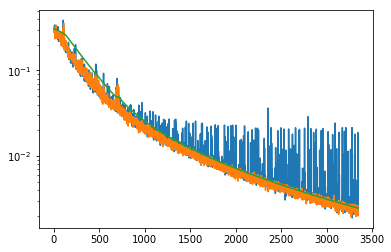

In [16]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 40

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [21]:
# Pooling first!
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori_r')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [22]:
address = 'Ori_r_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_r_params have existed!
Epoch 1, Moving_loss: 0.513830, Epoch_loss(mean): 0.389473, Train_acc 0.9190, Test_acc 0.9187
Epoch 2, Moving_loss: 0.300606, Epoch_loss(mean): 0.114281, Train_acc 0.9750, Test_acc 0.9675
Epoch 3, Moving_loss: 0.177550, Epoch_loss(mean): 0.067742, Train_acc 0.9810, Test_acc 0.9757
Epoch 4, Moving_loss: 0.116615, Epoch_loss(mean): 0.060533, Train_acc 0.9731, Test_acc 0.9701
Epoch 5, Moving_loss: 0.087784, Epoch_loss(mean): 0.061551, Train_acc 0.9853, Test_acc 0.9798
Epoch 6, Moving_loss: 0.069117, Epoch_loss(mean): 0.051120, Train_acc 0.9868, Test_acc 0.9823
Epoch 7, Moving_loss: 0.064475, Epoch_loss(mean): 0.060905, Train_acc 0.9790, Test_acc 0.9727
Epoch 8, Moving_loss: 0.055529, Epoch_loss(mean): 0.046978, Train_acc 0.9891, Test_acc 0.9844
Epoch 9, Moving_loss: 0.047550, Epoch_loss(mean): 0.039421, Train_acc 0.9913, Test_acc 0.9879
Epoch 10, Moving_loss: 0.038691, Epoch_loss(mean): 0.031183, Train_acc 0.9847, Test_acc 0.9830
Epoch 11, Moving_loss: 0.02548

KeyboardInterrupt: 

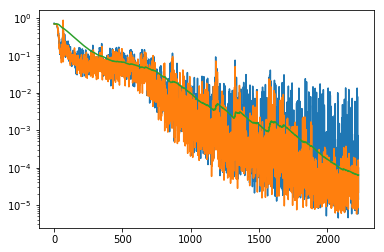

In [23]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 30

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# ReLU vs. ELU

In [5]:
# ELU !
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'elu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

CPU or GPU? :  gpu(0)
Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  elu
dilate_size: (1, 1)
num_filter:  1


In [6]:
address = 'Ori_ELU_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_ELU_params successful!
Epoch 1, Moving_loss: 0.504645, Epoch_loss(mean): 0.381747, Train_acc 0.9237, Test_acc 0.9146
Epoch 2, Moving_loss: 0.304506, Epoch_loss(mean): 0.124913, Train_acc 0.9548, Test_acc 0.9458
Epoch 3, Moving_loss: 0.177670, Epoch_loss(mean): 0.068596, Train_acc 0.9980, Test_acc 0.9968
Epoch 4, Moving_loss: 0.087309, Epoch_loss(mean): 0.005960, Train_acc 0.9997, Test_acc 0.9992
Epoch 5, Moving_loss: 0.042637, Epoch_loss(mean): 0.002167, Train_acc 0.9990, Test_acc 0.9974
Epoch 6, Moving_loss: 0.020716, Epoch_loss(mean): 0.001041, Train_acc 1.0000, Test_acc 0.9994
Epoch 7, Moving_loss: 0.009921, Epoch_loss(mean): 0.000142, Train_acc 1.0000, Test_acc 0.9996
Epoch 8, Moving_loss: 0.004758, Epoch_loss(mean): 0.000082, Train_acc 1.0000, Test_acc 0.9997
Epoch 9, Moving_loss: 0.002288, Epoch_loss(mean): 0.000051, Train_acc 1.0000, Test_acc 0.9997
Epoch 10, Moving_loss: 0.001110, Epoch_loss(mean): 0.000043, Train_acc 1.0000, Test_acc 0.9997
Epoch 11, Moving_loss: 

KeyboardInterrupt: 

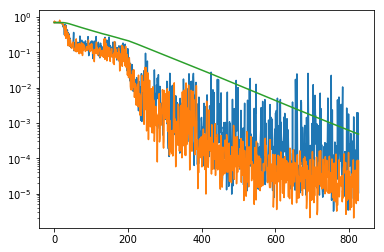

In [7]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 11

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# Max vs. Avg

In [8]:
# Avg  8
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 8,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4085]
h2 shape: [ 256   32    1 2036]
h3 shape: [ 256   64    1 1011]
Flat h4 shape: [  256 64704]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  8
pool_stride:  2
sl:  64704
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [9]:
address = 'Ori_AVG8_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_AVG8_params successful!
Epoch 1, Moving_loss: 0.557360, Epoch_loss(mean): 0.462152, Train_acc 0.9715, Test_acc 0.9661
Epoch 2, Moving_loss: 0.394379, Epoch_loss(mean): 0.253732, Train_acc 0.9952, Test_acc 0.9936
Epoch 6, Moving_loss: 0.358378, Epoch_loss(mean): 0.411755, Train_acc 0.9314, Test_acc 0.9256
Epoch 7, Moving_loss: 0.241992, Epoch_loss(mean): 0.143454, Train_acc 0.9890, Test_acc 0.9885
Epoch 8, Moving_loss: 0.155562, Epoch_loss(mean): 0.079487, Train_acc 0.9960, Test_acc 0.9957
Epoch 9, Moving_loss: 0.104193, Epoch_loss(mean): 0.058211, Train_acc 0.9959, Test_acc 0.9956
Epoch 10, Moving_loss: 0.074256, Epoch_loss(mean): 0.047920, Train_acc 0.9982, Test_acc 0.9976
Epoch 11, Moving_loss: 0.055744, Epoch_loss(mean): 0.039478, Train_acc 0.9988, Test_acc 0.9976
Epoch 12, Moving_loss: 0.044011, Epoch_loss(mean): 0.033570, Train_acc 0.9991, Test_acc 0.9979
Epoch 13, Moving_loss: 0.036751, Epoch_loss(mean): 0.030276, Train_acc 0.9988, Test_acc 0.9975
Epoch 14, Moving_lo

KeyboardInterrupt: 

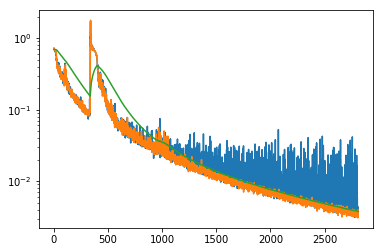

In [10]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 30

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [11]:
# Avg  4
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 4,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4087]
h2 shape: [ 256   32    1 2039]
h3 shape: [ 256   64    1 1015]
Flat h4 shape: [  256 64960]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  4
pool_stride:  2
sl:  64960
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [12]:
address = 'Ori_AVG4_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_AVG4_params successful!
Epoch 1, Moving_loss: 0.546260, Epoch_loss(mean): 0.449383, Train_acc 0.9363, Test_acc 0.9298
Epoch 2, Moving_loss: 0.289283, Epoch_loss(mean): 0.063739, Train_acc 0.9913, Test_acc 0.9889
Epoch 3, Moving_loss: 0.172482, Epoch_loss(mean): 0.064269, Train_acc 0.9962, Test_acc 0.9954
Epoch 4, Moving_loss: 0.084782, Epoch_loss(mean): 0.005708, Train_acc 0.9982, Test_acc 0.9971
Epoch 5, Moving_loss: 0.041514, Epoch_loss(mean): 0.002258, Train_acc 0.9997, Test_acc 0.9987
Epoch 6, Moving_loss: 0.020631, Epoch_loss(mean): 0.001730, Train_acc 1.0000, Test_acc 0.9987
Epoch 7, Moving_loss: 0.010285, Epoch_loss(mean): 0.000883, Train_acc 1.0000, Test_acc 0.9985
Epoch 8, Moving_loss: 0.005108, Epoch_loss(mean): 0.000423, Train_acc 1.0000, Test_acc 0.9986
Epoch 9, Moving_loss: 0.002568, Epoch_loss(mean): 0.000276, Train_acc 1.0000, Test_acc 0.9988
Epoch 10, Moving_loss: 0.001324, Epoch_loss(mean): 0.000196, Train_acc 1.0000, Test_acc 0.9988
Epoch 11, Moving_loss:

KeyboardInterrupt: 

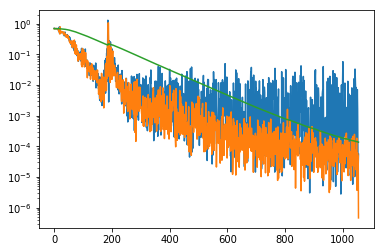

In [13]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 14

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [14]:
# Avg  2
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 2,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4088]
h2 shape: [ 256   32    1 2040]
h3 shape: [ 256   64    1 1016]
Flat h4 shape: [  256 65024]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  2
pool_stride:  2
sl:  65024
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [15]:
address = 'Ori_AVG2_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_AVG2_params successful!
Epoch 1, Moving_loss: 0.505465, Epoch_loss(mean): 0.380769, Train_acc 0.9863, Test_acc 0.9846
Epoch 2, Moving_loss: 0.250802, Epoch_loss(mean): 0.022586, Train_acc 0.9960, Test_acc 0.9959
Epoch 3, Moving_loss: 0.121910, Epoch_loss(mean): 0.005310, Train_acc 0.9995, Test_acc 0.9985
Epoch 4, Moving_loss: 0.059181, Epoch_loss(mean): 0.002594, Train_acc 0.9999, Test_acc 0.9988
Epoch 5, Moving_loss: 0.029150, Epoch_loss(mean): 0.001652, Train_acc 0.9999, Test_acc 0.9986
Epoch 6, Moving_loss: 0.014355, Epoch_loss(mean): 0.001042, Train_acc 1.0000, Test_acc 0.9986
Epoch 7, Moving_loss: 0.006929, Epoch_loss(mean): 0.000202, Train_acc 1.0000, Test_acc 0.9989
Epoch 8, Moving_loss: 0.003341, Epoch_loss(mean): 0.000092, Train_acc 1.0000, Test_acc 0.9986
Epoch 9, Moving_loss: 0.001611, Epoch_loss(mean): 0.000045, Train_acc 1.0000, Test_acc 0.9989
Epoch 10, Moving_loss: 0.000781, Epoch_loss(mean): 0.000029, Train_acc 1.0000, Test_acc 0.9989


KeyboardInterrupt: 

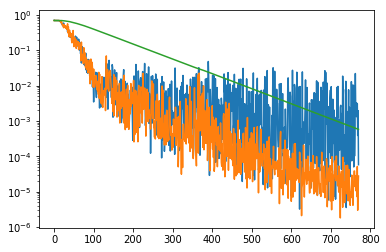

In [16]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 10

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [17]:
# max  16
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='max',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  max
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [18]:
address = 'Ori_MAX16_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_MAX16_params successful!
Epoch 1, Moving_loss: 0.499543, Epoch_loss(mean): 0.369184, Train_acc 0.9840, Test_acc 0.9819
Epoch 2, Moving_loss: 0.248860, Epoch_loss(mean): 0.025796, Train_acc 0.9974, Test_acc 0.9966
Epoch 3, Moving_loss: 0.124479, Epoch_loss(mean): 0.011604, Train_acc 0.9972, Test_acc 0.9957
Epoch 4, Moving_loss: 0.063161, Epoch_loss(mean): 0.007155, Train_acc 0.9963, Test_acc 0.9959
Epoch 5, Moving_loss: 0.033530, Epoch_loss(mean): 0.006438, Train_acc 0.9989, Test_acc 0.9975
Epoch 6, Moving_loss: 0.017726, Epoch_loss(mean): 0.003535, Train_acc 0.9995, Test_acc 0.9979
Epoch 7, Moving_loss: 0.010497, Epoch_loss(mean): 0.003970, Train_acc 0.9994, Test_acc 0.9974
Epoch 8, Moving_loss: 0.008543, Epoch_loss(mean): 0.006325, Train_acc 0.9995, Test_acc 0.9982
Epoch 9, Moving_loss: 0.007623, Epoch_loss(mean): 0.006730, Train_acc 0.9984, Test_acc 0.9959
Epoch 10, Moving_loss: 0.004646, Epoch_loss(mean): 0.002037, Train_acc 0.9993, Test_acc 0.9971
Epoch 11, Moving_loss

KeyboardInterrupt: 

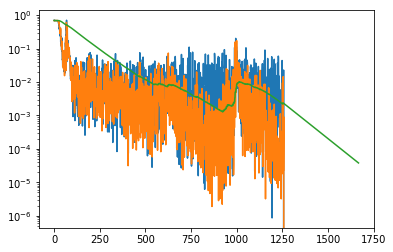

In [19]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 11

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [20]:
# max  8
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='max',pool_size = 8,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4085]
h2 shape: [ 256   32    1 2036]
h3 shape: [ 256   64    1 1011]
Flat h4 shape: [  256 64704]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  max
pool_size:  8
pool_stride:  2
sl:  64704
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [21]:
address = 'Ori_MAX8_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_MAX8_params successful!
Epoch 1, Moving_loss: 0.646843, Epoch_loss(mean): 0.623849, Train_acc 0.9079, Test_acc 0.9071
Epoch 2, Moving_loss: 0.439181, Epoch_loss(mean): 0.262359, Train_acc 0.9980, Test_acc 0.9974
Epoch 3, Moving_loss: 0.290881, Epoch_loss(mean): 0.159580, Train_acc 0.9956, Test_acc 0.9929
Epoch 4, Moving_loss: 0.197656, Epoch_loss(mean): 0.115415, Train_acc 0.9994, Test_acc 0.9981
Epoch 5, Moving_loss: 0.143683, Epoch_loss(mean): 0.094172, Train_acc 0.9977, Test_acc 0.9959
Epoch 6, Moving_loss: 0.104916, Epoch_loss(mean): 0.071435, Train_acc 0.9995, Test_acc 0.9988
Epoch 7, Moving_loss: 0.078606, Epoch_loss(mean): 0.055290, Train_acc 0.9999, Test_acc 0.9986
Epoch 8, Moving_loss: 0.060698, Epoch_loss(mean): 0.044996, Train_acc 0.9999, Test_acc 0.9986
Epoch 9, Moving_loss: 0.048394, Epoch_loss(mean): 0.037627, Train_acc 1.0000, Test_acc 0.9987
Epoch 10, Moving_loss: 0.039639, Epoch_loss(mean): 0.031909, Train_acc 1.0000, Test_acc 0.9988
Epoch 11, Moving_loss:

KeyboardInterrupt: 

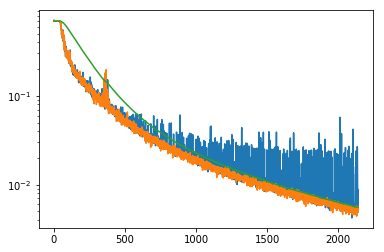

In [22]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 19

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [23]:
# max  4
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='max',pool_size = 4,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4087]
h2 shape: [ 256   32    1 2039]
h3 shape: [ 256   64    1 1015]
Flat h4 shape: [  256 64960]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  max
pool_size:  4
pool_stride:  2
sl:  64960
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [24]:
address = 'Ori_MAX4_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_MAX4_params successful!
Epoch 1, Moving_loss: 0.576871, Epoch_loss(mean): 0.502837, Train_acc 0.9780, Test_acc 0.9711
Epoch 2, Moving_loss: 0.409883, Epoch_loss(mean): 0.263895, Train_acc 0.9867, Test_acc 0.9840
Epoch 3, Moving_loss: 0.278341, Epoch_loss(mean): 0.163045, Train_acc 0.9954, Test_acc 0.9936
Epoch 4, Moving_loss: 0.193580, Epoch_loss(mean): 0.118857, Train_acc 0.9980, Test_acc 0.9968
Epoch 5, Moving_loss: 0.140245, Epoch_loss(mean): 0.093504, Train_acc 0.9987, Test_acc 0.9978
Epoch 6, Moving_loss: 0.104864, Epoch_loss(mean): 0.073724, Train_acc 0.9990, Test_acc 0.9980
Epoch 7, Moving_loss: 0.082111, Epoch_loss(mean): 0.061209, Train_acc 0.9984, Test_acc 0.9971
Epoch 8, Moving_loss: 0.064306, Epoch_loss(mean): 0.048576, Train_acc 0.9997, Test_acc 0.9984
Epoch 9, Moving_loss: 0.052379, Epoch_loss(mean): 0.041734, Train_acc 0.9997, Test_acc 0.9986
Epoch 10, Moving_loss: 0.044118, Epoch_loss(mean): 0.036720, Train_acc 0.9996, Test_acc 0.9981
Epoch 11, Moving_loss:

KeyboardInterrupt: 

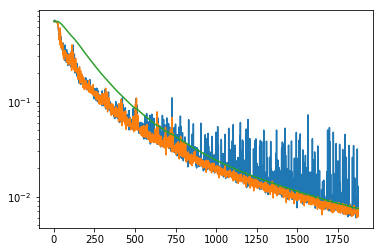

In [25]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 21

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [26]:
# max  2
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='max',pool_size = 2,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4088]
h2 shape: [ 256   32    1 2040]
h3 shape: [ 256   64    1 1016]
Flat h4 shape: [  256 65024]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  max
pool_size:  2
pool_stride:  2
sl:  65024
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [27]:
address = 'Ori_MAX2_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_MAX2_params successful!
Epoch 1, Moving_loss: 0.598339, Epoch_loss(mean): 0.547516, Train_acc 0.9320, Test_acc 0.9255
Epoch 2, Moving_loss: 0.318887, Epoch_loss(mean): 0.076961, Train_acc 0.9960, Test_acc 0.9965
Epoch 3, Moving_loss: 0.155315, Epoch_loss(mean): 0.007412, Train_acc 0.9996, Test_acc 0.9991
Epoch 4, Moving_loss: 0.074639, Epoch_loss(mean): 0.001544, Train_acc 1.0000, Test_acc 0.9996
Epoch 5, Moving_loss: 0.035723, Epoch_loss(mean): 0.000470, Train_acc 1.0000, Test_acc 0.9993
Epoch 6, Moving_loss: 0.017112, Epoch_loss(mean): 0.000262, Train_acc 1.0000, Test_acc 0.9994
Epoch 7, Moving_loss: 0.008178, Epoch_loss(mean): 0.000086, Train_acc 1.0000, Test_acc 0.9995
Epoch 8, Moving_loss: 0.003922, Epoch_loss(mean): 0.000067, Train_acc 1.0000, Test_acc 0.9995
Epoch 9, Moving_loss: 0.001890, Epoch_loss(mean): 0.000052, Train_acc 1.0000, Test_acc 0.9992


KeyboardInterrupt: 

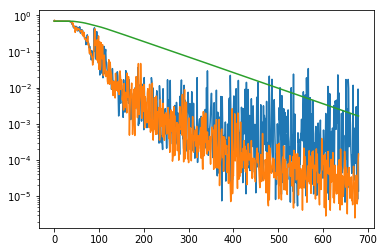

In [28]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 8

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# Delated or not?

In [29]:
# Delated = 2
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 2, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4074]
h2 shape: [ 256   32    1 2023]
h3 shape: [256  64   1 997]
Flat h4 shape: [  256 63808]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  63808
act_type:  relu
dilate_size: (1, 2)
num_filter:  1


In [30]:
address = 'Ori_Delated2_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_Delated2_params successful!
Epoch 1, Moving_loss: 0.565817, Epoch_loss(mean): 0.491210, Train_acc 0.9291, Test_acc 0.9153
Epoch 2, Moving_loss: 0.337038, Epoch_loss(mean): 0.133457, Train_acc 0.9758, Test_acc 0.9659
Epoch 3, Moving_loss: 0.176483, Epoch_loss(mean): 0.033716, Train_acc 0.9950, Test_acc 0.9929
Epoch 4, Moving_loss: 0.152763, Epoch_loss(mean): 0.118597, Train_acc 0.9817, Test_acc 0.9755
Epoch 5, Moving_loss: 0.084294, Epoch_loss(mean): 0.024627, Train_acc 0.9960, Test_acc 0.9951
Epoch 6, Moving_loss: 0.045178, Epoch_loss(mean): 0.010164, Train_acc 0.9978, Test_acc 0.9968
Epoch 7, Moving_loss: 0.024774, Epoch_loss(mean): 0.006469, Train_acc 0.9985, Test_acc 0.9977
Epoch 8, Moving_loss: 0.014030, Epoch_loss(mean): 0.004343, Train_acc 0.9990, Test_acc 0.9977
Epoch 9, Moving_loss: 0.008247, Epoch_loss(mean): 0.003180, Train_acc 0.9989, Test_acc 0.9975
Epoch 10, Moving_loss: 0.005127, Epoch_loss(mean): 0.002410, Train_acc 0.9996, Test_acc 0.9984
Epoch 11, Moving_l

KeyboardInterrupt: 

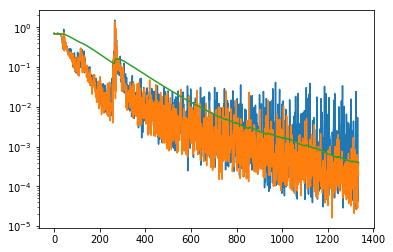

In [31]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 16

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# Conv. feature maps: one half, double, fourfold?

In [32]:
# nf = 1/2
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1/2 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256    8    1 4081]
h2 shape: [ 256   16    1 2030]
h3 shape: [ 256   32    1 1004]
Flat h4 shape: [  256 32128]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  32128
act_type:  relu
dilate_size: (1, 1)
num_filter:  0.5


In [33]:
address = 'Ori_nf05_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_nf05_params successful!
Epoch 1, Moving_loss: 0.574829, Epoch_loss(mean): 0.510391, Train_acc 0.9461, Test_acc 0.9378
Epoch 2, Moving_loss: 0.354513, Epoch_loss(mean): 0.138480, Train_acc 0.9843, Test_acc 0.9797
Epoch 3, Moving_loss: 0.200786, Epoch_loss(mean): 0.065708, Train_acc 0.9883, Test_acc 0.9848
Epoch 4, Moving_loss: 0.106428, Epoch_loss(mean): 0.022691, Train_acc 0.9966, Test_acc 0.9957
Epoch 5, Moving_loss: 0.056459, Epoch_loss(mean): 0.011213, Train_acc 0.9983, Test_acc 0.9978
Epoch 6, Moving_loss: 0.031300, Epoch_loss(mean): 0.008393, Train_acc 0.9970, Test_acc 0.9958
Epoch 7, Moving_loss: 0.017721, Epoch_loss(mean): 0.005431, Train_acc 0.9986, Test_acc 0.9985
Epoch 8, Moving_loss: 0.011301, Epoch_loss(mean): 0.005590, Train_acc 0.9986, Test_acc 0.9978
Epoch 9, Moving_loss: 0.007412, Epoch_loss(mean): 0.004118, Train_acc 0.9991, Test_acc 0.9989
Epoch 10, Moving_loss: 0.005490, Epoch_loss(mean): 0.003512, Train_acc 0.9994, Test_acc 0.9991
Epoch 11, Moving_loss:

KeyboardInterrupt: 

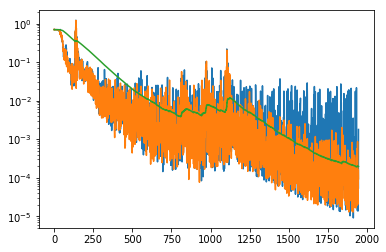

In [34]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 26

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [35]:
# nf = 2
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=2 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   32    1 4081]
h2 shape: [ 256   64    1 2030]
h3 shape: [ 256  128    1 1004]
Flat h4 shape: [   256 128512]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  128512
act_type:  relu
dilate_size: (1, 1)
num_filter:  2


In [36]:
address = 'Ori_nf2_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_nf2_params successful!
Epoch 1, Moving_loss: 0.479331, Epoch_loss(mean): 0.335501, Train_acc 0.9905, Test_acc 0.9906
Epoch 2, Moving_loss: 0.238199, Epoch_loss(mean): 0.021563, Train_acc 0.9900, Test_acc 0.9904
Epoch 3, Moving_loss: 0.118679, Epoch_loss(mean): 0.010614, Train_acc 0.9945, Test_acc 0.9951
Epoch 4, Moving_loss: 0.061140, Epoch_loss(mean): 0.010678, Train_acc 0.9985, Test_acc 0.9983
Epoch 5, Moving_loss: 0.030570, Epoch_loss(mean): 0.002929, Train_acc 0.9997, Test_acc 0.9992
Epoch 6, Moving_loss: 0.015450, Epoch_loss(mean): 0.001840, Train_acc 0.9992, Test_acc 0.9987
Epoch 7, Moving_loss: 0.009596, Epoch_loss(mean): 0.003921, Train_acc 0.9998, Test_acc 0.9993
Epoch 8, Moving_loss: 0.005015, Epoch_loss(mean): 0.000809, Train_acc 0.9998, Test_acc 0.9993
Epoch 9, Moving_loss: 0.003179, Epoch_loss(mean): 0.001586, Train_acc 0.9990, Test_acc 0.9983
Epoch 10, Moving_loss: 0.002327, Epoch_loss(mean): 0.001782, Train_acc 0.9998, Test_acc 0.9993
Epoch 11, Moving_loss: 

KeyboardInterrupt: 

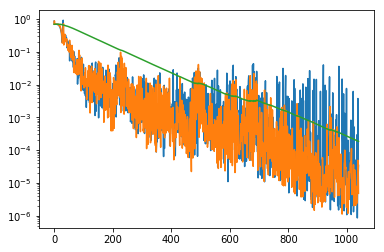

In [37]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 14

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [3]:
# nf = 4
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=4 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

CPU or GPU? :  gpu(0)
Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   64    1 4081]
h2 shape: [ 256  128    1 2030]
h3 shape: [ 256  256    1 1004]
Flat h4 shape: [   256 257024]
h5 shape: [256  64]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  257024
act_type:  relu
dilate_size: (1, 1)
num_filter:  4


In [ ]:
address = 'Ori_nf4_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.01, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_nf4_params have existed!


# Conv. 4? 5? layers

In [3]:
# 1CONV
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = '1CONV')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

CPU or GPU? :  gpu(0)
Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
h4 shape: [256  64   1 491]
Flat h5 shape: [  256 31424]
h6 shape: [256  64]
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  31424
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [4]:
address = 'Ori_1CONV_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_1CONV_params successful!
Epoch 1, Moving_loss: 0.507786, Epoch_loss(mean): 0.389416, Train_acc 0.9821, Test_acc 0.9816
Epoch 2, Moving_loss: 0.251775, Epoch_loss(mean): 0.021231, Train_acc 0.9833, Test_acc 0.9857
Epoch 3, Moving_loss: 0.125853, Epoch_loss(mean): 0.013012, Train_acc 0.9968, Test_acc 0.9981
Epoch 4, Moving_loss: 0.063577, Epoch_loss(mean): 0.007358, Train_acc 0.9980, Test_acc 0.9980
Epoch 5, Moving_loss: 0.032747, Epoch_loss(mean): 0.004497, Train_acc 0.9994, Test_acc 0.9993
Epoch 6, Moving_loss: 0.017803, Epoch_loss(mean): 0.004212, Train_acc 0.9994, Test_acc 0.9993
Epoch 7, Moving_loss: 0.009765, Epoch_loss(mean): 0.002370, Train_acc 0.9997, Test_acc 0.9995
Epoch 8, Moving_loss: 0.013035, Epoch_loss(mean): 0.013568, Train_acc 0.9967, Test_acc 0.9961
Epoch 9, Moving_loss: 0.008472, Epoch_loss(mean): 0.004475, Train_acc 0.9993, Test_acc 0.9991
Epoch 10, Moving_loss: 0.004921, Epoch_loss(mean): 0.001900, Train_acc 0.9998, Test_acc 0.9994
Epoch 11, Moving_loss

KeyboardInterrupt: 

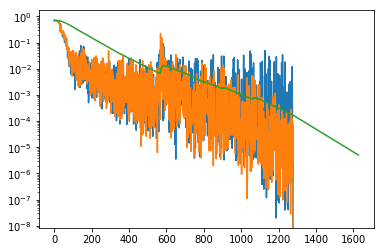

In [5]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 17

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [9]:
# 2CONV
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = '2CONV')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
h4 shape: [256  64   1 491]
h5 shape: [256  64   1 235]
Flat h6 shape: [  256 15040]
h7 shape: [256  64]
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  15040
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [10]:
address = 'Ori_2CONV_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_2CONV_params have existed!
Epoch 1, Moving_loss: 0.479611, Epoch_loss(mean): 0.334147, Train_acc 0.9570, Test_acc 0.9554
Epoch 2, Moving_loss: 0.269691, Epoch_loss(mean): 0.079269, Train_acc 0.9800, Test_acc 0.9776
Epoch 3, Moving_loss: 0.163483, Epoch_loss(mean): 0.065891, Train_acc 0.9772, Test_acc 0.9753
Epoch 4, Moving_loss: 0.109259, Epoch_loss(mean): 0.057389, Train_acc 0.9699, Test_acc 0.9652
Epoch 5, Moving_loss: 0.078071, Epoch_loss(mean): 0.050788, Train_acc 0.9851, Test_acc 0.9816
Epoch 6, Moving_loss: 0.055881, Epoch_loss(mean): 0.036555, Train_acc 0.9910, Test_acc 0.9900
Epoch 7, Moving_loss: 0.047250, Epoch_loss(mean): 0.038827, Train_acc 0.9928, Test_acc 0.9905
Epoch 8, Moving_loss: 0.045192, Epoch_loss(mean): 0.043663, Train_acc 0.9928, Test_acc 0.9914
Epoch 9, Moving_loss: 0.039429, Epoch_loss(mean): 0.033739, Train_acc 0.9932, Test_acc 0.9918
Epoch 10, Moving_loss: 0.023738, Epoch_loss(mean): 0.010151, Train_acc 0.9978, Test_acc 0.9971
Epoch 11, Moving_loss: 0.0

KeyboardInterrupt: 

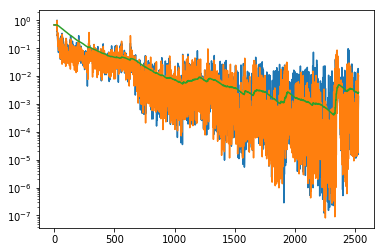

In [11]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 31

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# MLP hidden: 32, 128?

In [12]:
# numfc 32
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=32, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  32]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [13]:
address = 'Ori_numfc32_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_numfc32_params successful!
Epoch 1, Moving_loss: 0.459186, Epoch_loss(mean): 0.286842, Train_acc 0.9783, Test_acc 0.9710
Epoch 2, Moving_loss: 0.258959, Epoch_loss(mean): 0.083614, Train_acc 0.9866, Test_acc 0.9821
Epoch 3, Moving_loss: 0.150287, Epoch_loss(mean): 0.050884, Train_acc 0.9724, Test_acc 0.9654
Epoch 4, Moving_loss: 0.086668, Epoch_loss(mean): 0.029941, Train_acc 0.9950, Test_acc 0.9942
Epoch 5, Moving_loss: 0.045036, Epoch_loss(mean): 0.007601, Train_acc 0.9949, Test_acc 0.9931
Epoch 6, Moving_loss: 0.065509, Epoch_loss(mean): 0.075406, Train_acc 0.9935, Test_acc 0.9927
Epoch 7, Moving_loss: 0.037748, Epoch_loss(mean): 0.013318, Train_acc 0.9982, Test_acc 0.9976
Epoch 8, Moving_loss: 0.020599, Epoch_loss(mean): 0.005179, Train_acc 0.9987, Test_acc 0.9981
Epoch 9, Moving_loss: 0.011327, Epoch_loss(mean): 0.003086, Train_acc 0.9997, Test_acc 0.9989
Epoch 10, Moving_loss: 0.006262, Epoch_loss(mean): 0.001680, Train_acc 0.9997, Test_acc 0.9990
Epoch 11, Moving_lo

KeyboardInterrupt: 

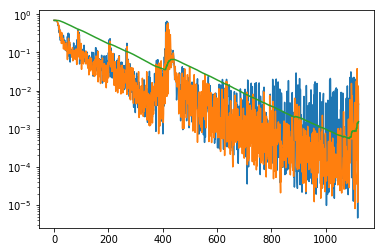

In [14]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 14

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [17]:
# numfc 128
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=128, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256 128]
Dropout:  0
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [18]:
address = 'Ori_numfc128_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_numfc128_params have existed!
Epoch 2, Moving_loss: 0.288003, Epoch_loss(mean): 0.060058, Train_acc 0.9945, Test_acc 0.9951
Epoch 3, Moving_loss: 0.145119, Epoch_loss(mean): 0.015955, Train_acc 0.9935, Test_acc 0.9949
Epoch 4, Moving_loss: 0.074709, Epoch_loss(mean): 0.010980, Train_acc 0.9954, Test_acc 0.9956
Epoch 5, Moving_loss: 0.039873, Epoch_loss(mean): 0.007858, Train_acc 0.9974, Test_acc 0.9978
Epoch 24, Moving_loss: 0.000004, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.4993
Epoch 25, Moving_loss: 0.000002, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.4999
Epoch 26, Moving_loss: 0.000001, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.5002
Epoch 27, Moving_loss: 0.000000, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.5010
Epoch 28, Moving_loss: 0.000000, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.5002
Epoch 29, Moving_loss: 0.000000, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.4996
Epoch 30, Moving_l

KeyboardInterrupt: 

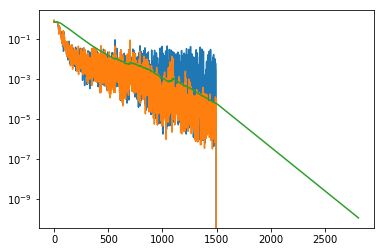

In [28]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 20

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# MLP 2?3? layers

In [29]:
# 2MLP
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = '2MLP')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
h6 shape: [256  64]
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [30]:
address = 'Ori_2MLP_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_2MLP_params successful!
Epoch 1, Moving_loss: 0.558511, Epoch_loss(mean): 0.470794, Train_acc 0.9508, Test_acc 0.9382
Epoch 2, Moving_loss: 0.364610, Epoch_loss(mean): 0.186075, Train_acc 0.9250, Test_acc 0.9244
Epoch 3, Moving_loss: 0.221041, Epoch_loss(mean): 0.093730, Train_acc 0.9594, Test_acc 0.9506
Epoch 4, Moving_loss: 0.140270, Epoch_loss(mean): 0.069569, Train_acc 0.9577, Test_acc 0.9485
Epoch 5, Moving_loss: 0.112233, Epoch_loss(mean): 0.090898, Train_acc 0.9830, Test_acc 0.9751
Epoch 6, Moving_loss: 0.080695, Epoch_loss(mean): 0.049294, Train_acc 0.9776, Test_acc 0.9715
Epoch 7, Moving_loss: 0.050202, Epoch_loss(mean): 0.025285, Train_acc 0.9900, Test_acc 0.9874
Epoch 8, Moving_loss: 0.030545, Epoch_loss(mean): 0.013714, Train_acc 0.9972, Test_acc 0.9955
Epoch 9, Moving_loss: 0.019742, Epoch_loss(mean): 0.011065, Train_acc 0.9995, Test_acc 0.9994
Epoch 10, Moving_loss: 0.010511, Epoch_loss(mean): 0.002275, Train_acc 0.9997, Test_acc 0.9996
Epoch 11, Moving_loss:

KeyboardInterrupt: 

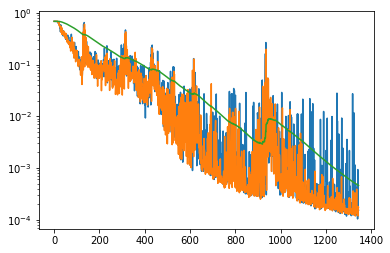

In [31]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 18

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [32]:
# 3MLP
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0, net = '3MLP')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
h6 shape: [256  64]
h7 shape: [256  64]
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [33]:
address = 'Ori_3MLP_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./Ori_3MLP_params successful!
Epoch 1, Moving_loss: 0.594879, Epoch_loss(mean): 0.527446, Train_acc 0.9266, Test_acc 0.9107
Epoch 2, Moving_loss: 0.424074, Epoch_loss(mean): 0.280005, Train_acc 0.9870, Test_acc 0.9859
Epoch 3, Moving_loss: 0.287810, Epoch_loss(mean): 0.168183, Train_acc 0.9963, Test_acc 0.9954
Epoch 4, Moving_loss: 0.198036, Epoch_loss(mean): 0.118897, Train_acc 0.9995, Test_acc 0.9992
Epoch 5, Moving_loss: 0.140289, Epoch_loss(mean): 0.089252, Train_acc 0.9995, Test_acc 0.9993
Epoch 6, Moving_loss: 0.104914, Epoch_loss(mean): 0.073669, Train_acc 0.9997, Test_acc 0.9995
Epoch 7, Moving_loss: 0.079204, Epoch_loss(mean): 0.056573, Train_acc 0.9997, Test_acc 0.9993
Epoch 8, Moving_loss: 0.062131, Epoch_loss(mean): 0.047105, Train_acc 0.9995, Test_acc 0.9990
Epoch 9, Moving_loss: 0.050223, Epoch_loss(mean): 0.039544, Train_acc 0.9978, Test_acc 0.9975
Epoch 10, Moving_loss: 0.041132, Epoch_loss(mean): 0.033235, Train_acc 1.0000, Test_acc 0.9995
Epoch 11, Moving_loss:

KeyboardInterrupt: 

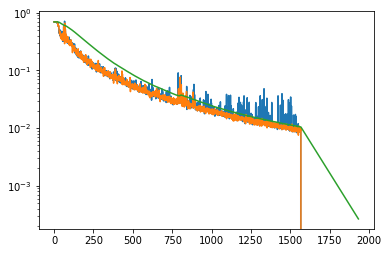

In [34]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 19

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# Dropout or not?

In [39]:
# Dropout 0.25
import networks.CNN as CNN
Basic_cnn = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0.25, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0.25
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [40]:
address = 'Ori_Dropout025_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_Dropout025_params have existed!
Epoch 1, Moving_loss: 0.500733, Epoch_loss(mean): 0.370556, Train_acc 0.9651, Test_acc 0.9658
Epoch 2, Moving_loss: 0.254251, Epoch_loss(mean): 0.033024, Train_acc 0.9895, Test_acc 0.9912
Epoch 3, Moving_loss: 0.129539, Epoch_loss(mean): 0.017411, Train_acc 0.9980, Test_acc 0.9979
Epoch 4, Moving_loss: 0.067004, Epoch_loss(mean): 0.010256, Train_acc 0.9955, Test_acc 0.9957
Epoch 5, Moving_loss: 0.037451, Epoch_loss(mean): 0.011765, Train_acc 0.9981, Test_acc 0.9978
Epoch 6, Moving_loss: 0.020227, Epoch_loss(mean): 0.004993, Train_acc 0.9969, Test_acc 0.9972
Epoch 7, Moving_loss: 0.011550, Epoch_loss(mean): 0.003886, Train_acc 0.9990, Test_acc 0.9985
Epoch 8, Moving_loss: 0.007428, Epoch_loss(mean): 0.003986, Train_acc 0.9997, Test_acc 0.9994
Epoch 9, Moving_loss: 0.007109, Epoch_loss(mean): 0.006147, Train_acc 0.9997, Test_acc 0.9993
Epoch 10, Moving_loss: 0.006305, Epoch_loss(mean): 0.005663, Train_acc 0.9995, Test_acc 0.9987
Epoch 11, Moving_loss

KeyboardInterrupt: 

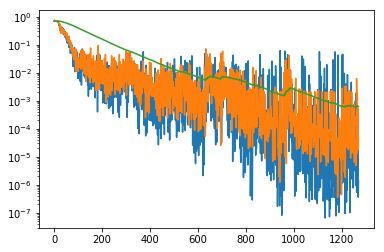

In [41]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 16

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [50]:
# Dropout 0.5
import networks.CNN as CNN
Basic_cnn0 = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0.5, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0.5
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [51]:
address = 'Ori_Dropout05_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn0.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_Dropout05_params have existed!
Epoch 1, Moving_loss: 0.506705, Epoch_loss(mean): 0.378646, Train_acc 0.9774, Test_acc 0.9767
Epoch 2, Moving_loss: 0.275435, Epoch_loss(mean): 0.068406, Train_acc 0.9924, Test_acc 0.9926
Epoch 3, Moving_loss: 0.147850, Epoch_loss(mean): 0.033240, Train_acc 0.9978, Test_acc 0.9982
Epoch 4, Moving_loss: 0.083044, Epoch_loss(mean): 0.024168, Train_acc 0.9978, Test_acc 0.9974
Epoch 5, Moving_loss: 0.050751, Epoch_loss(mean): 0.021892, Train_acc 0.9990, Test_acc 0.9989
Epoch 6, Moving_loss: 0.033515, Epoch_loss(mean): 0.018038, Train_acc 0.9985, Test_acc 0.9980
Epoch 7, Moving_loss: 0.021916, Epoch_loss(mean): 0.012168, Train_acc 0.5000, Test_acc 0.5001
Epoch 8, Moving_loss: 0.010418, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.5004


KeyboardInterrupt: 

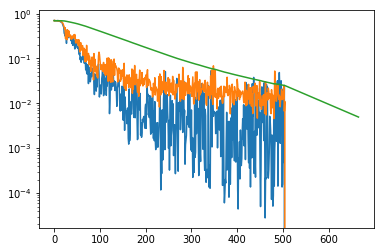

In [52]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 5

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

In [57]:
# Dropout 0.75
import networks.CNN as CNN
Basic_cnn0 = CNN.Basic_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None, num_fc=64, sl=1, pool_type='avg',pool_size = 16,pool_stride=2
                          , act_type = 'relu'
                          , dilate_size = 1, nf=1 ,drop_prob=0.75, net = 'Ori')
# net: ['Ori', 'Ori_r, '2MLP', '3MLP','1CONV','2CONV']

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...

h1 shape: [ 256   16    1 4081]
h2 shape: [ 256   32    1 2030]
h3 shape: [ 256   64    1 1004]
Flat h4 shape: [  256 64256]
h5 shape: [256  64]
Dropout:  0.75
yhat_linear shape: [256   2]

pool_type:  avg
pool_size:  16
pool_stride:  2
sl:  64256
act_type:  relu
dilate_size: (1, 1)
num_filter:  1


In [58]:
address = 'Ori_Dropout075_params'
MKdir_checkdir('./%s' %address)

Info = Basic_cnn0.fit(epochs = 100, lr = 0.001, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info

    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

./Ori_Dropout075_params have existed!
Epoch 1, Moving_loss: 0.631772, Epoch_loss(mean): 0.601539, Train_acc 0.9418, Test_acc 0.9301
Epoch 2, Moving_loss: 0.418126, Epoch_loss(mean): 0.229911, Train_acc 0.9696, Test_acc 0.9662
Epoch 3, Moving_loss: 0.288982, Epoch_loss(mean): 0.173347, Train_acc 0.9474, Test_acc 0.9377
Epoch 4, Moving_loss: 0.217812, Epoch_loss(mean): 0.154366, Train_acc 0.9328, Test_acc 0.9216
Epoch 5, Moving_loss: 0.175021, Epoch_loss(mean): 0.140229, Train_acc 0.9963, Test_acc 0.9953
Epoch 6, Moving_loss: 0.142738, Epoch_loss(mean): 0.114309, Train_acc 0.9982, Test_acc 0.9979
Epoch 7, Moving_loss: 0.121484, Epoch_loss(mean): 0.101830, Train_acc 0.9926, Test_acc 0.9919
Epoch 8, Moving_loss: 0.111746, Epoch_loss(mean): 0.102291, Train_acc 0.9990, Test_acc 0.9990
Epoch 9, Moving_loss: 0.080014, Epoch_loss(mean): 0.060217, Train_acc 0.5000, Test_acc 0.5003
Epoch 10, Moving_loss: 0.038034, Epoch_loss(mean): 0.000000, Train_acc 0.5000, Test_acc 0.5005
Epoch 11, Moving_loss

KeyboardInterrupt: 

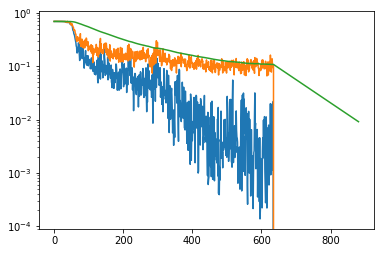

In [59]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 8

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# PLB

In [60]:
import networks.CNN as CNN
PLB_cnn = CNN.PLB_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None) 

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...
h1 shape: [ 256   64    1 2044]
h2 shape: [256 128   1 503]
h3 shape: [256 256   1 118]
h4 shape: [256 512   1  14]
Flat h5 shape: [ 256 7168]
h6 shape: [256 128]
h7 shape: [256  64]
yhat_linear shape: [256   2]



In [61]:
address = 'PLB_params'
MKdir_checkdir('./%s' %address)

Info = PLB_cnn.fit(epochs = 100, lr = 0.003, smoothing_constant = .01)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info
    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)

MKDIR: ./PLB_params successful!
Epoch 1, Moving_loss: 0.691481, Epoch_loss(mean): 0.690803, Train_acc 0.5000, Test_acc 0.5002
Epoch 2, Moving_loss: 0.684887, Epoch_loss(mean): 0.678148, Train_acc 0.5000, Test_acc 0.5002
Epoch 3, Moving_loss: 0.639973, Epoch_loss(mean): 0.619047, Train_acc 0.9099, Test_acc 0.8980
Epoch 4, Moving_loss: 0.371143, Epoch_loss(mean): 0.136729, Train_acc 0.9808, Test_acc 0.9785
Epoch 5, Moving_loss: 0.207889, Epoch_loss(mean): 0.061330, Train_acc 0.9851, Test_acc 0.9800
Epoch 6, Moving_loss: 0.133716, Epoch_loss(mean): 0.060553, Train_acc 0.9759, Test_acc 0.9701
Epoch 7, Moving_loss: 0.090857, Epoch_loss(mean): 0.055667, Train_acc 0.9884, Test_acc 0.9866
Epoch 8, Moving_loss: 0.050700, Epoch_loss(mean): 0.014854, Train_acc 0.9980, Test_acc 0.9967
Epoch 9, Moving_loss: 0.026504, Epoch_loss(mean): 0.004466, Train_acc 0.9992, Test_acc 0.9982
Epoch 10, Moving_loss: 0.014088, Epoch_loss(mean): 0.003096, Train_acc 0.9993, Test_acc 0.9982
Epoch 11, Moving_loss: 0.01

KeyboardInterrupt: 

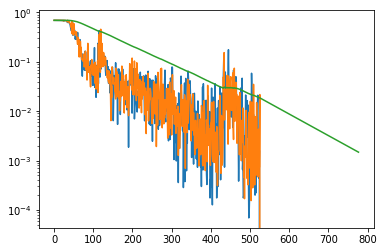

In [70]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 18

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`

# PRL

In [ ]:
import networks.CNN as CNN
PRL_cnn = CNN.PRL_cnn(train = train_dict['1'], test = test_dict['1'], colomns_add = colomns_add
                          , batch_size = 256, last_batch = 'discard'
                          , params_init=None) 

Label for training: (19712,)
Dataset for training: (19712, 8192)

Label for testing: (19136,)
Dataset for testing: (19136, 8192)

Initiate weights from random...
Debuging...
h1 shape: [ 256    8    1 8129]
h2 shape: [ 256    8    1 4046]
h3 shape: [ 256   16    1 4015]
h4 shape: [ 256   16    1 1998]
h5 shape: [ 256   32    1 1983]
h6 shape: [256  32   1 983]
Flat h7 shape: [  256 31456]
h8 shape: [256  64]
h9 shape: [256  64]
yhat_linear shape: [256   2]



In [ ]:
address = 'PRL_params'
MKdir_checkdir('./%s' %address)

Info = PRL_cnn.fit(epochs = 100, lr = 0.0003, smoothing_constant = .01,drop_prob=0.5)
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info
    # Save
    for key, value in {'params':params
#                                  , 'loss_history': nd.array(loss_history)
#                                  , 'loss_v_history': nd.array(loss_v_history)
#                                  , 'moving_loss_history': nd.array(moving_loss_history)
#                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
#                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
                      }.items():

        nd.save("./%s/%s_%s" %(address,key,index+1), value)    

./PRL_params have existed!
Epoch 1, Moving_loss: 0.693198, Epoch_loss(mean): 0.693169, Train_acc 0.5000, Test_acc 0.5003
Epoch 2, Moving_loss: 0.693177, Epoch_loss(mean): 0.693159, Train_acc 0.5000, Test_acc 0.5001
Epoch 3, Moving_loss: 0.678084, Epoch_loss(mean): 0.671758, Train_acc 0.7995, Test_acc 0.7820
Epoch 4, Moving_loss: 0.421139, Epoch_loss(mean): 0.200617, Train_acc 0.9535, Test_acc 0.9448
Epoch 5, Moving_loss: 0.273665, Epoch_loss(mean): 0.141544, Train_acc 0.9603, Test_acc 0.9494
Epoch 6, Moving_loss: 0.200160, Epoch_loss(mean): 0.131095, Train_acc 0.9540, Test_acc 0.9419
Epoch 7, Moving_loss: 0.161088, Epoch_loss(mean): 0.126592, Train_acc 0.9511, Test_acc 0.9400
Epoch 8, Moving_loss: 0.131625, Epoch_loss(mean): 0.104636, Train_acc 0.9657, Test_acc 0.9546
Epoch 9, Moving_loss: 0.116444, Epoch_loss(mean): 0.101855, Train_acc 0.9607, Test_acc 0.9506
Epoch 10, Moving_loss: 0.100895, Epoch_loss(mean): 0.088700, Train_acc 0.9744, Test_acc 0.9702
Epoch 11, Moving_loss: 0.089213,

In [ ]:
plt.semilogy(loss_v_history)
plt.semilogy(loss_history)
plt.plot(moving_loss_history)

EPOCH = 

# 仅保留某 epoch 对应的模型参数结果
!rm `ls ./$address/params_*|egrep -v ./$address/params_$EPOCH`